In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
sys.path.insert(0, '../../')
from src.encode_data import *
from src.midi_data import *
from src.data_sources import process_all, arr2csv
from src.midi_transform import *
from src.fastai_data import *

ModuleNotFoundError: No module named 'src'

In [3]:
import traceback
import time

## Standardize and reformat raw midi files before encoding to text
- Transform key to C major
- Remove unused instruments
- Combine multiple tracks with the same instrument into a single part
- Melody, Piano, String

### Load midi data

In [4]:
version = 'v16'
data_path = Path('data/midi')
version_path = data_path/version

In [5]:
# input_file = 'data/midi/v16/midi_sources/from_mxl/ecomp/2008/Kociuban16.mid' # out of bounds
# input_file = 'data/midi/v16/midi_sources/midiworld/named_midi/Huey_Lewis_-_Perfect_World.mid'
# input_file = 'data/midi/v16/midi_sources/hooktheory/pianoroll/w/wan-wan/sky-filling-departed-spirit---lightning-word/bridge_key_original.mid'

In [6]:
# input_file = 'data/midi/v16/midi_sources/lmd_clean/Blondie/Dreaming.mid' # out of memory

In [6]:
# duration out of range
input_file = 'data/midi/v16/midi_sources/hooktheory/pianoroll/y/yevgueni/welkenraedt/intro-and-verse_key_original.mid'

In [7]:
stream = file2stream(input_file)

In [8]:
stream.flat.highestTime * 4

384.0

In [9]:
stream.flat.getElementsByClass('Note').highestTime, stream.flat.getElementsByClass('Chord').highestTime

(460.25, 459.75)

In [10]:
sample_freq = 12
maxTimeStep = round(stream.flat.highestTime * sample_freq)+1; maxTimeStep

215643106

In [25]:
stream.show('text')

{0.0} <music21.stream.Part 0x7f1e2231ca20>
    {0.0} <music21.instrument.Piano Piano>
    {0.0} <music21.tempo.MetronomeMark allegro moderato Quarter=130.0>
    {0.0} <music21.meter.TimeSignature 4/4>
    {0.0} <music21.stream.Voice 0x7f1e2223e978>
        {0.0} <music21.note.Note G>
        {2.5} <music21.note.Note D>
        {5.5} <music21.note.Note E>
        {6.0} <music21.note.Note E>
        {7.3333} <music21.note.Note C>
        {9.5} <music21.note.Note A>
        {12.0} <music21.note.Note F>
        {14.0} <music21.chord.Chord A5 C5>
        {15.0} <music21.chord.Chord D5 B5>
        {16.0} <music21.note.Note E>
        {17.5} <music21.note.Note C>
        {20.0} <music21.chord.Chord C5 E5>
        {21.5} <music21.chord.Chord C6 E5>
        {22.0} <music21.chord.Chord E5 C6>
        {23.3333} <music21.chord.Chord C5 A5>
        {24.0} <music21.chord.Chord G5 B4>
        {28.5} <music21.note.Note G>
        {31.5} <music21.note.Note G>
        {37.5} <music21.note.Note C>
      

In [22]:
stream.show('midi')

In [17]:
score_arr = np.zeros((maxTimeStep, len(stream.parts), NOTE_SIZE))

MemoryError: 

In [9]:
chordarr = stream2chordarr(stream)

In [14]:
npenc = chordarr2npenc(chordarr); npenc.shape

(24, 2)

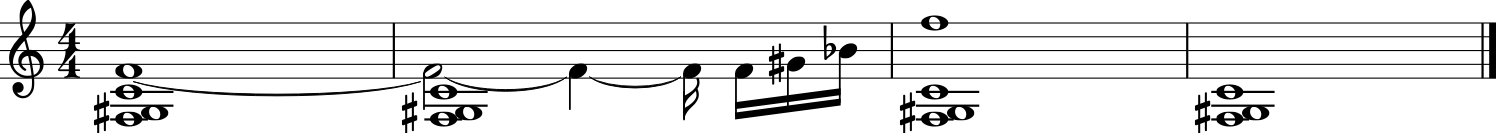

In [16]:
npenc2stream(npenc).show()

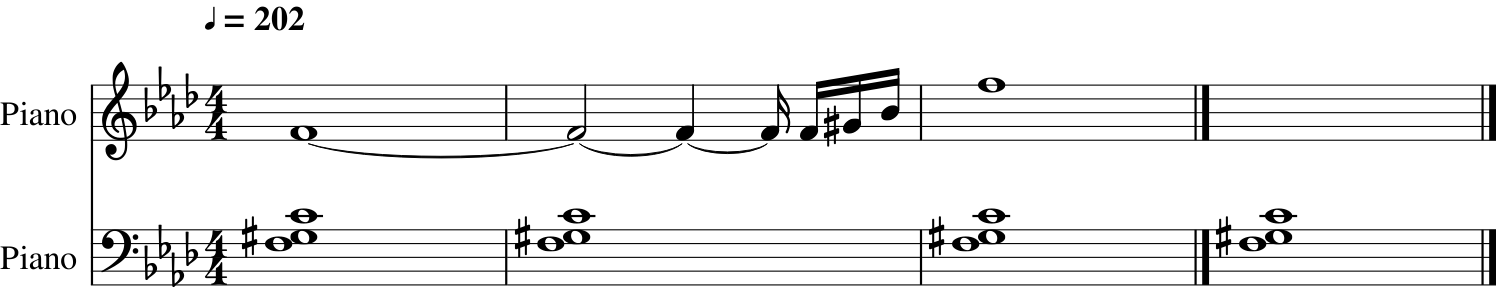

In [17]:
stream.show()